<a href="https://colab.research.google.com/github/aghoshpro/aghoshpro/blob/main/STORYTELLING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code with SAP Labs India - Discover, Design, Deliver 



### Challenge
  *  Propose an AI based tool that can take a data set, identify patterns in the data, can interpret the result, and can then produce an output story that is understandable to a business user based on the context. System should be able to pro-actively analyse data on behalf of users and generate smart feeds using natural language generation techniques which can then be consumed easily by business users with very less efforts; the story can be told in any combination of plain English supporting visualizations, which however should be kept rather elementary given the intended target user.

### Task:
* Given data/analytics output, create an AI based tool 
* that is able to turn the data into interactive data stories. has a generic architecture; that is, the tool should not be hardcoded to any specific input data. However, may be given additional meta data describing the structure of an input data set (such as descriptions of the columns and how to treat the values, structural or logical relationships between columns, etc).
* to generate deep insights, infer pattern and help in business decisions.
have personalization profiles; these could be represented as meta data describing what would be of interest to a given user.
* understandable to a business user.
* with interactive and intuitive interface.
* [Bonus] to have context and interactive personalization.

### Data:

* You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

Within the Excel Sheet, there are 3 Tabs – Stores, Features and Sales


* **Source:** https://www.kaggle.com/manjeetsingh/retaildataset 
###Stores
   *Anonymized information about the 45 stores, indicating the type and size of store
### Features
   * **Store :** the store number
   * **Date:** the week.
   * **Temperature:** average temperature in the region.
   * **Fuel_Price:** cost of fuel in the region.
   * **MarkDown1-5 :** anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
   * **CPI :** the consumer price index.
   * **Unemployment :** the unemployment rate
   * **IsHoliday :** whether the week is a special holiday week
### Sales
   * **Store:**the store number
   * **Dept :** the department number
   * **Date :** the week
   * **Weekly_Sales :** sales for the given department in the given store
   * **IsHoliday :** whether the week is a special holiday week

### The Task
   * Predict the department-wide sales for each store for the following year
   *Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact

In [ ]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#happy_2015 = pd.read_csv("drive/My Drive/Competition/Kaggle The World Happiness Report/2015.csv")
#happy_2015.head()

In [ ]:
#print(f" (rows, cols) = {happy_2015.shape}")

In [ ]:
!pip install storyscience

     |████████████████████████████████| 368kB 37.3MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 1.5MB 38.0MB/s 
     |████████████████████████████████| 22.3MB 1.9MB/s 
     |████████████████████████████████| 13.2MB 234kB/s 
  Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import storyscience
storyscience.shree()

'HI SHREE'

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Features data set.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('Features data set.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Features data set.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 12 columns


In [ ]:
df1.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


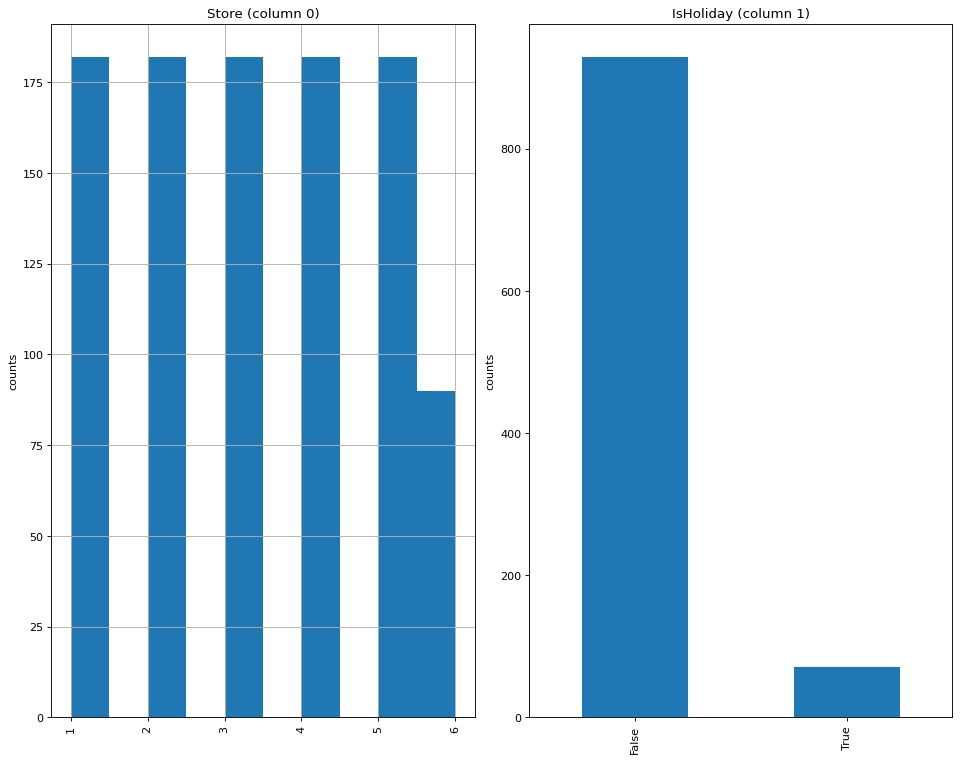

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

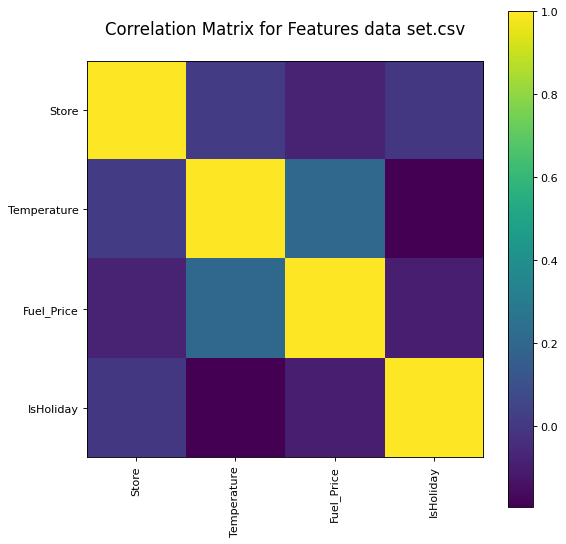

In [ ]:
plotCorrelationMatrix(df1, 8)

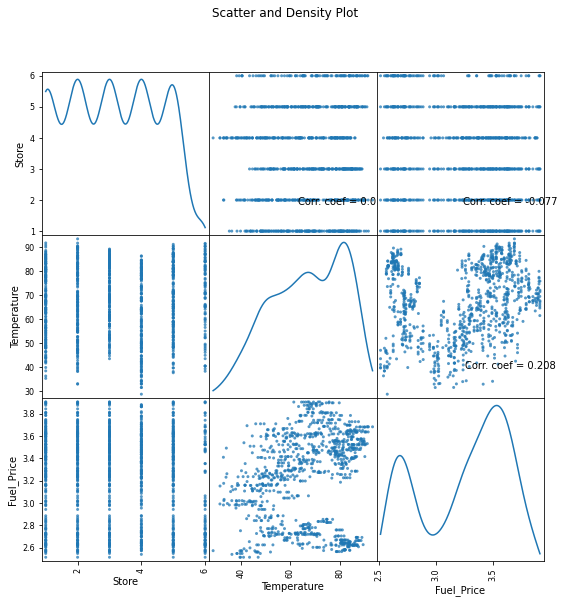

In [ ]:
plotScatterMatrix(df1, 9, 10)

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# sales data-set.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('sales data-set.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'sales data-set.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 5 columns


In [ ]:
df2.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


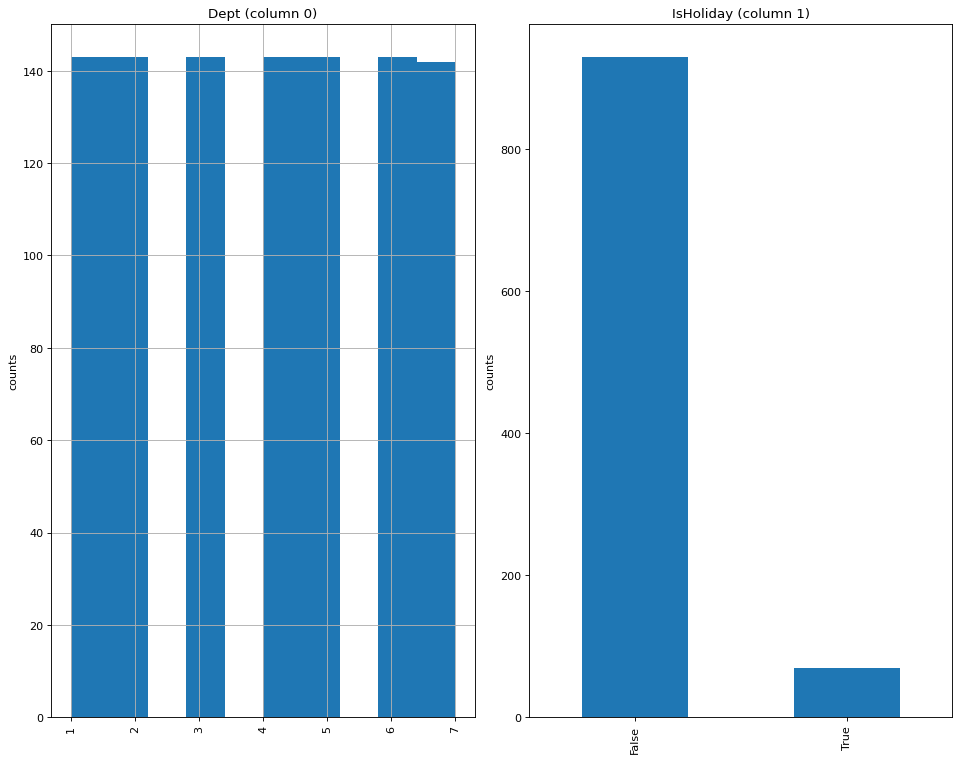

In [ ]:
plotPerColumnDistribution(df2, 10, 5)

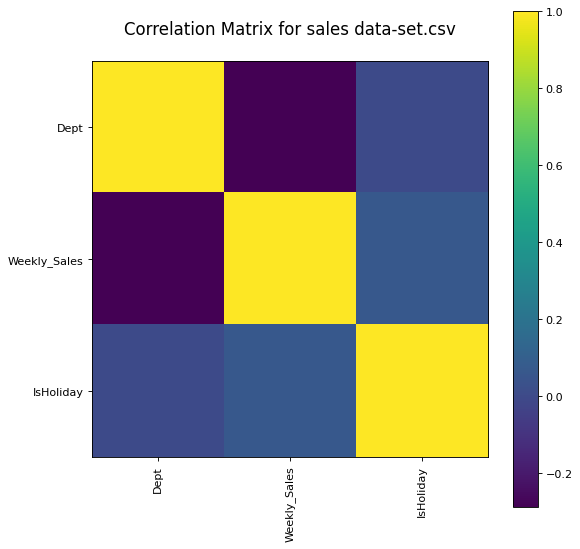

In [ ]:
plotCorrelationMatrix(df2, 8)

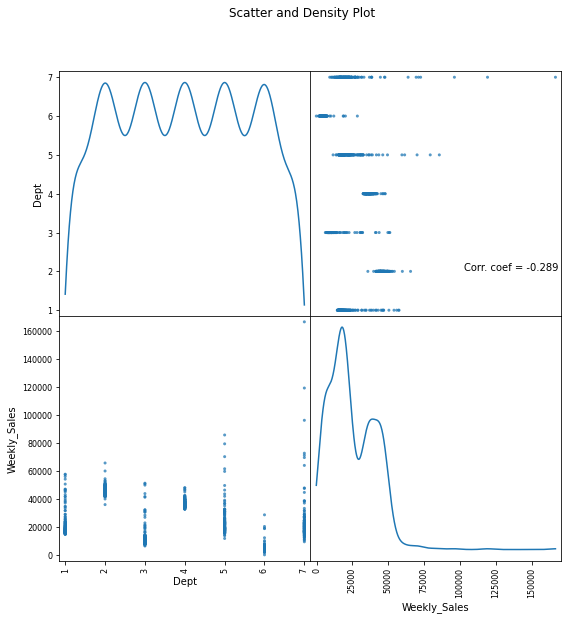

In [ ]:
plotScatterMatrix(df2, 9, 10)

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# stores data-set.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('stores data-set.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'stores data-set.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 45 rows and 3 columns


In [ ]:
df3.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


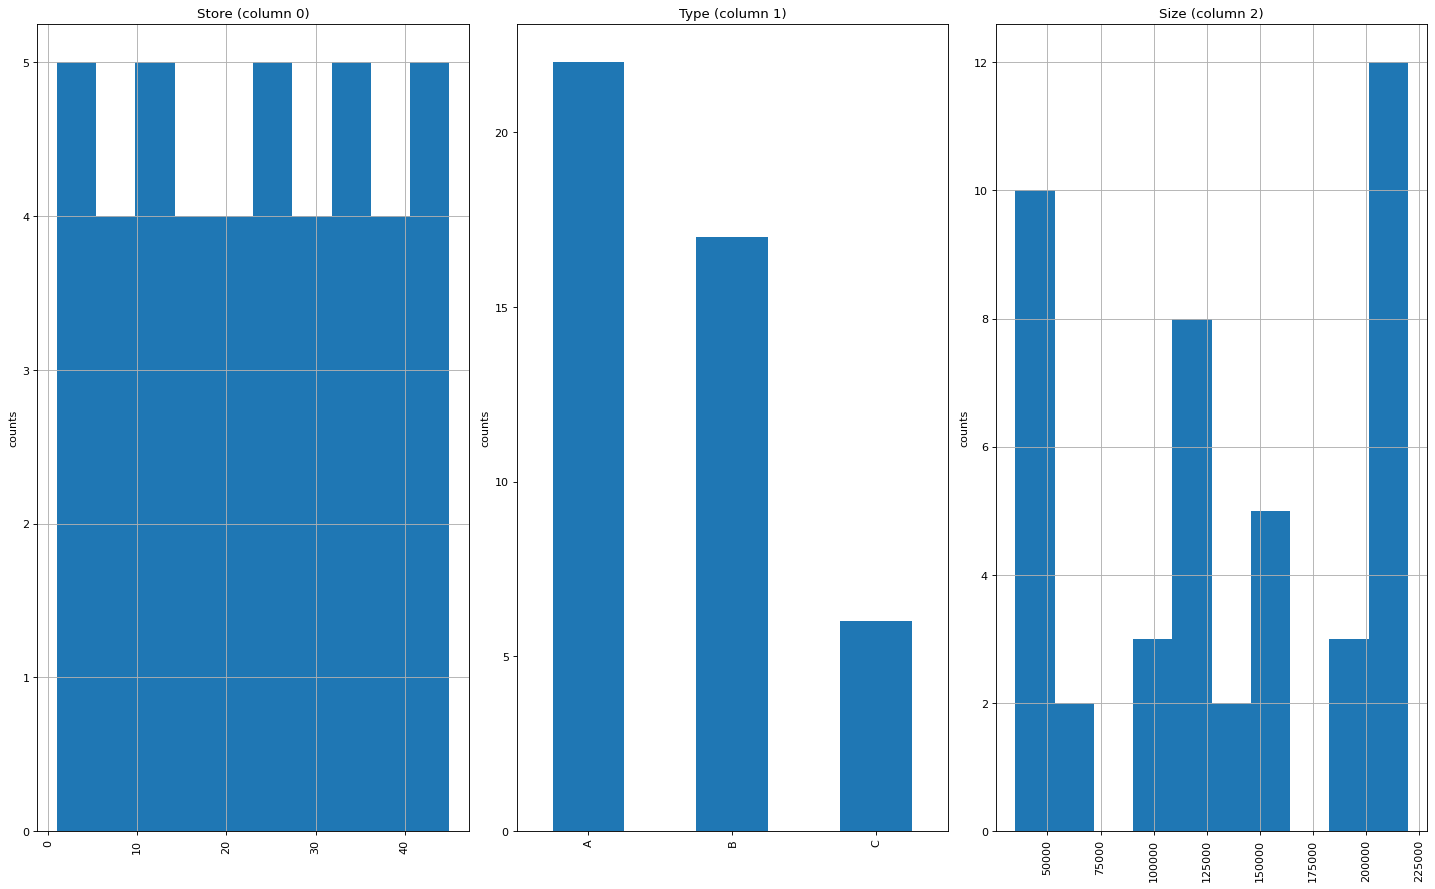

In [ ]:
plotPerColumnDistribution(df3, 10, 5)

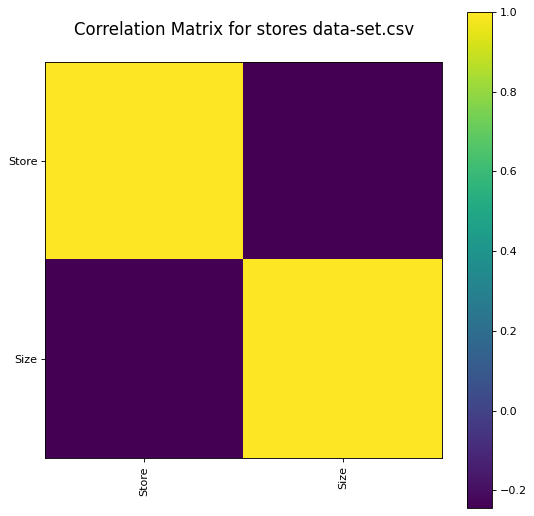

In [ ]:
plotCorrelationMatrix(df3, 8)

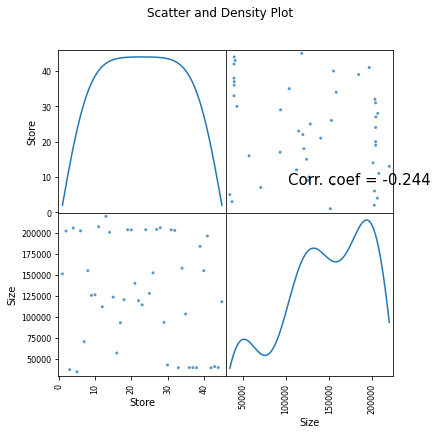

In [ ]:
plotScatterMatrix(df3, 6, 15)

In [ ]:
##Import needed packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate

In [ ]:
df_sales = pd.read_csv('sales data-set.csv', parse_dates=["Date"])
df_stores = pd.read_csv('stores data-set.csv')
df_features = pd.read_csv('Features data set.csv', parse_dates=["Date"])

In [ ]:
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [ ]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


MERGE DATA

In [ ]:
df = df_sales.merge(df_stores).merge(df_features)
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421569,45,98,2012-10-26,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [ ]:
train_data = df.sample(frac=0.8, random_state=123)
train_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
7678,1,6,2012-02-24,3784.06,False,A,151315,57.25,3.555,9349.61,7556.01,3.20,1219.92,8143.59,220.636902,7.348
152194,16,44,2011-04-29,2881.02,False,B,57197,37.77,3.663,NaN,NaN,NaN,NaN,NaN,192.624332,6.339
139533,15,30,2010-06-25,4398.48,False,B,123737,72.79,2.958,NaN,NaN,NaN,NaN,NaN,132.497600,8.185
129743,14,32,2010-07-16,10504.92,False,A,200898,77.84,2.783,NaN,NaN,NaN,NaN,NaN,182.260441,8.743
131316,14,2,2010-12-24,117588.65,False,A,200898,30.59,3.141,NaN,NaN,NaN,NaN,NaN,182.544590,8.724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163873,17,40,2011-11-18,43497.51,False,B,93188,32.93,3.489,6004.88,247.29,32.39,653.49,4391.01,129.826833,6.617
66326,7,29,2012-02-24,1569.33,False,B,70713,24.41,3.129,10170.57,4331.71,93.06,2699.15,3456.70,196.949901,8.256
374389,40,27,2011-01-14,833.72,False,A,155083,18.55,3.215,NaN,NaN,NaN,NaN,NaN,132.951065,5.114
401036,43,83,2011-04-22,7875.16,False,C,41062,74.49,3.807,NaN,NaN,NaN,NaN,NaN,207.258193,10.581


In [ ]:
test_data = df[~df.index.isin(train_data.index)]
test_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
4,1,5,2010-05-02,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
7,1,8,2010-05-02,40129.01,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
31,1,33,2010-05-02,8589.77,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
36,1,38,2010-05-02,115564.35,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
38,1,41,2010-05-02,1011.83,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421550,45,60,2012-10-26,117.00,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421557,45,81,2012-10-26,14693.09,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421559,45,83,2012-10-26,717.82,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421561,45,87,2012-10-26,8187.66,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [ ]:
train_data.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,120579.000000,88968.000000,109706.000000,107973.000000,121154.000000,337256.000000,337256.000000
mean,22.199949,44.278693,16005.850245,136683.421339,60.096445,3.360589,7251.314881,3321.570124,1441.500159,3380.885733,4617.863124,171.240410,7.958653
std,12.797122,30.486483,22786.116825,60964.036144,18.432844,0.458069,8315.888147,9451.278490,9638.131925,6294.461261,5922.228630,39.162461,1.861670
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2075.795000,93638.000000,46.700000,2.933000,2240.270000,41.640000,5.080000,504.220000,1879.860000,132.022667,6.891000
50%,22.000000,38.000000,7620.885000,140167.000000,62.090000,3.452000,5349.520000,193.260000,24.600000,1481.310000,3358.940000,182.350989,7.866000
75%,33.000000,74.000000,20244.472500,202505.000000,74.280000,3.737000,9210.900000,1926.050000,103.340000,3578.400000,5535.130000,212.464799,8.567000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


Tranform date to 3 columns

In [ ]:
train_data["Month"] = train_data.Date.dt.month
train_data["Year"] = train_data.Date.dt.year
train_data["Week"] = train_data.Date.dt.weekofyear
train_data["Day"] = train_data.Date.dt.dayofyear
train_data.drop(['Date'],axis=1,inplace=True)

In [ ]:
train_data.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,Week,Day
count,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,120579.000000,88968.000000,109706.000000,107973.000000,121154.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000
mean,22.199949,44.278693,16005.850245,136683.421339,60.096445,3.360589,7251.314881,3321.570124,1441.500159,3380.885733,4617.863124,171.240410,7.958653,6.475674,2010.969121,26.001604,181.615147
std,12.797122,30.486483,22786.116825,60964.036144,18.432844,0.458069,8315.888147,9451.278490,9638.131925,6294.461261,5922.228630,39.162461,1.861670,3.324607,0.797013,14.525581,101.609368
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,1.000000,2010.000000,1.000000,4.000000
25%,11.000000,18.000000,2075.795000,93638.000000,46.700000,2.933000,2240.270000,41.640000,5.080000,504.220000,1879.860000,132.022667,6.891000,4.000000,2010.000000,14.000000,96.000000
50%,22.000000,38.000000,7620.885000,140167.000000,62.090000,3.452000,5349.520000,193.260000,24.600000,1481.310000,3358.940000,182.350989,7.866000,6.000000,2011.000000,26.000000,181.000000
75%,33.000000,74.000000,20244.472500,202505.000000,74.280000,3.737000,9210.900000,1926.050000,103.340000,3578.400000,5535.130000,212.464799,8.567000,9.000000,2012.000000,38.000000,267.000000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,12.000000,2012.000000,52.000000,365.000000


Data frame information

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337256 entries, 7678 to 374395
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         337256 non-null  int64  
 1   Dept          337256 non-null  int64  
 2   Weekly_Sales  337256 non-null  float64
 3   IsHoliday     337256 non-null  bool   
 4   Type          337256 non-null  object 
 5   Size          337256 non-null  int64  
 6   Temperature   337256 non-null  float64
 7   Fuel_Price    337256 non-null  float64
 8   MarkDown1     120579 non-null  float64
 9   MarkDown2     88968 non-null   float64
 10  MarkDown3     109706 non-null  float64
 11  MarkDown4     107973 non-null  float64
 12  MarkDown5     121154 non-null  float64
 13  CPI           337256 non-null  float64
 14  Unemployment  337256 non-null  float64
 15  Month         337256 non-null  int64  
 16  Year          337256 non-null  int64  
 17  Week          337256 non-null  int64  
 18  D

Number of Nulls for each Feature

In [ ]:
train_data.isnull().sum()

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       216677
MarkDown2       248288
MarkDown3       227550
MarkDown4       229283
MarkDown5       216102
CPI                  0
Unemployment         0
Month                0
Year                 0
Week                 0
Day                  0
dtype: int64

Replace all missing value with zero

In [ ]:
lst = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for column in lst:
    train_data[column].fillna((train_data[column].mean()), inplace=True)
train_data.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,Week,Day
7678,1,6,3784.06,False,A,151315,57.25,3.555,9349.610000,7556.010000,3.200000,1219.920000,8143.590000,220.636902,7.348,2,2012,8,55
152194,16,44,2881.02,False,B,57197,37.77,3.663,7251.314881,3321.570124,1441.500159,3380.885733,4617.863124,192.624332,6.339,4,2011,17,119
139533,15,30,4398.48,False,B,123737,72.79,2.958,7251.314881,3321.570124,1441.500159,3380.885733,4617.863124,132.497600,8.185,6,2010,25,176
129743,14,32,10504.92,False,A,200898,77.84,2.783,7251.314881,3321.570124,1441.500159,3380.885733,4617.863124,182.260441,8.743,7,2010,28,197
131316,14,2,117588.65,False,A,200898,30.59,3.141,7251.314881,3321.570124,1441.500159,3380.885733,4617.863124,182.544590,8.724,12,2010,51,358


Encoding

In [ ]:
m = pd.get_dummies(train_data["Type"])
m = m.rename(columns={"A": "TypeA", "B": "TypeB", "C": "TypeC"})

train_data = pd.concat([train_data, m], axis = 1)
train_data.drop("Type", axis = 1, inplace = True)

m = pd.get_dummies(train_data["IsHoliday"])
m = m.rename(columns={False: "Not Holiday", True: "Holiday"})

train_data = pd.concat([train_data, m], axis = 1)
train_data.drop("IsHoliday", axis = 1, inplace = True)

m = pd.get_dummies(train_data["Store"])
m = m.rename(columns=lambda x: 'Store' + str(x))

train_data = pd.concat([train_data, m], axis = 1)
train_data.drop("Store", axis = 1, inplace = True)

m = pd.get_dummies(train_data["Dept"])
m = m.rename(columns=lambda x: 'Dept' + str(x))

train_data = pd.concat([train_data, m], axis = 1)
train_data.drop("Dept", axis = 1, inplace = True)

m = pd.get_dummies(train_data["Week"])
m = m.rename(columns=lambda x: 'Week' + str(x))

train_data = pd.concat([train_data, m], axis = 1)
train_data.drop("Week", axis = 1, inplace = True)

In [ ]:
train_data

,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,Day,TypeA,TypeB,TypeC,Not Holiday,Holiday,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,Store10,Store11,Store12,Store13,Store14,Store15,Store16,Store17,Store18,Store19,Store20,Store21,...,Week13,Week14,Week15,Week16,Week17,Week18,Week19,Week20,Week21,Week22,Week23,Week24,Week25,Week26,Week27,Week28,Week29,Week30,Week31,Week32,Week33,Week34,Week35,Week36,Week37,Week38,Week39,Week40,Week41,Week42,Week43,Week44,Week45,Week46,Week47,Week48,Week49,Week50,Week51,Week52
7678,3784.06,151315,57.25,3.555,9349.610000,7556.010000,3.200000,1219.920000,8143.590000,220.636902,7.348,2,2012,55,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152194,2881.02,57197,37.77,3.663,7251.314881,3321.570124,1441.500159,3380.885733,4617.863124,192.624332,6.339,4,2011,119,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139533,4398.48,123737,72.79,2.958,7251.314881,3321.570124,1441.500159,3380.885733,4617.863124,132.497600,8.185,6,2010,176,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129743,10504.92,200898,77.84,2.783,7251.314881,3321.570124,1441.500159,3380.885733,4617.863124,182.260441,8.743,7,2010,197,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131316,117588.65,200898,30.59,3.141,7251.314881,3321.570124,1441.500159,3380.885733,4617.863124,182.544590,8.724,12,2010,358,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163873,43497.51,93188,32.93,3.489,6004.880000,247.290000,32.390000,653.490000,4391.010000,129.826833,6.617,11,2011,322,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
66326,1569.33,70713,24.41,3.129,10170.570000,4331.710000,93.060000,2699.150000,3456.700000,196.949901,8.256,2,2012,55,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
374389,833.72,155083,18.55,3.215,7251.314881,3321.570124,1441.500159,3380.885733,4617.863124,132.951065,5.114,1,2011,14,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
401036,7875.16,41062,74.49,3.807,7251.314881,3321.570124,1441.500159,3380.885733,4617.863124,207.258193,10.581,4,2011,112,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data["Month"] = test_data.Date.dt.month
test_data["Year"] = test_data.Date.dt.year
test_data["Week"] = test_data.Date.dt.weekofyear
test_data["Day"] = test_data.Date.dt.dayofyear
test_data.drop(['Date'],axis=1,inplace=True)

lst = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for column in lst:
    test_data[column].fillna(0, inplace=True)

s = pd.get_dummies(test_data["Type"])
s = s.rename(columns={"A": "TypeA", "B": "TypeB", "C": "TypeC"})

test_data = pd.concat([test_data, s], axis = 1)
test_data.drop("Type", axis = 1, inplace = True)

m = pd.get_dummies(test_data["IsHoliday"])
m = m.rename(columns={False: "Not Holiday", True: "Holiday"})

test_data = pd.concat([test_data, m], axis = 1)
test_data.drop("Dept", axis = 1, inplace = True)

m = pd.get_dummies(test_data["Week"])
m = m.rename(columns=lambda x: 'Week' + str(x))

test_data = pd.concat([test_data, m], axis = 1)
test_data.drop("Week", axis = 1, inplace = True)

In [ ]:
test_data

,Store,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,Day,TypeA,TypeB,TypeC,Not Holiday,Holiday,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17,Week18,Week19,Week20,Week21,Week22,Week23,Week24,Week25,Week26,Week27,Week28,Week29,Week30,Week31,Week32,Week33,Week34,Week35,Week36,Week37,Week38,Week39,Week40,Week41,Week42,Week43,Week44,Week45,Week46,Week47,Week48,Week49,Week50,Week51,Week52
4,1,32229.38,False,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,5,2010,122,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,40129.01,False,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,5,2010,122,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,1,8589.77,False,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,5,2010,122,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,1,115564.35,False,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,5,2010,122,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,1,1011.83,False,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,5,2010,122,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421550,45,117.00,False,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,10,2012,300,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
421557,45,14693.09,False,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,10,2012,300,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
421559,45,717.82,False,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,10,2012,300,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
421561,45,8187.66,False,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,10,2012,300,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Normalization

In [ ]:
df_weekly_sales = train_data['Weekly_Sales']
train_data = train_data / train_data.max()
train_data['Weekly_Sales'] = df_weekly_sales

In [ ]:
train_data

,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,Day,TypeA,TypeB,TypeC,Not Holiday,Holiday,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,Store10,Store11,Store12,Store13,Store14,Store15,Store16,Store17,Store18,Store19,Store20,Store21,...,Week13,Week14,Week15,Week16,Week17,Week18,Week19,Week20,Week21,Week22,Week23,Week24,Week25,Week26,Week27,Week28,Week29,Week30,Week31,Week32,Week33,Week34,Week35,Week36,Week37,Week38,Week39,Week40,Week41,Week42,Week43,Week44,Week45,Week46,Week47,Week48,Week49,Week50,Week51,Week52
7678,3784.06,0.688979,0.571700,0.795658,0.105470,0.072293,0.000023,0.018080,0.075043,0.970973,0.513379,0.166667,1.000000,0.150685,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152194,2881.02,0.260434,0.377172,0.819830,0.081800,0.031779,0.010178,0.050106,0.042553,0.847696,0.442884,0.333333,0.999503,0.326027,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139533,4398.48,0.563409,0.726882,0.662041,0.081800,0.031779,0.010178,0.050106,0.042553,0.583092,0.571858,0.500000,0.999006,0.482192,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129743,10504.92,0.914744,0.777312,0.622874,0.081800,0.031779,0.010178,0.050106,0.042553,0.802087,0.610843,0.583333,0.999006,0.539726,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131316,117588.65,0.914744,0.305472,0.702999,0.081800,0.031779,0.010178,0.050106,0.042553,0.803337,0.609516,1.000000,0.999006,0.980822,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163873,43497.51,0.424311,0.328840,0.780886,0.067739,0.002366,0.000229,0.009685,0.040463,0.571338,0.462307,0.916667,0.999503,0.882192,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
66326,1569.33,0.321976,0.243759,0.700313,0.114731,0.041444,0.000657,0.040002,0.031853,0.866732,0.576818,0.166667,1.000000,0.150685,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374389,833.72,0.706136,0.185241,0.719561,0.081800,0.031779,0.010178,0.050106,0.042553,0.585087,0.357298,0.083333,0.999503,0.038356,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
test_weekly_sales = test_data['Weekly_Sales']
test_data = test_data / test_data.max()
test_data['Weekly_Sales'] = test_weekly_sales

In [ ]:
test_data

,Store,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,Day,TypeA,TypeB,TypeC,Not Holiday,Holiday,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17,Week18,Week19,Week20,Week21,Week22,Week23,Week24,Week25,Week26,Week27,Week28,Week29,Week30,Week31,Week32,Week33,Week34,Week35,Week36,Week37,Week38,Week39,Week40,Week41,Week42,Week43,Week44,Week45,Week46,Week47,Week48,Week49,Week50,Week51,Week52
4,0.0222222,32229.38,0,0.688979,0.422508,0.575649,0,0,0,0,0,0.928987,0.566338,0.416667,0.999006,0.334247,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.0222222,40129.01,0,0.688979,0.422508,0.575649,0,0,0,0,0,0.928987,0.566338,0.416667,0.999006,0.334247,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,0.0222222,8589.77,0,0.688979,0.422508,0.575649,0,0,0,0,0,0.928987,0.566338,0.416667,0.999006,0.334247,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,0.0222222,115564.35,0,0.688979,0.422508,0.575649,0,0,0,0,0,0.928987,0.566338,0.416667,0.999006,0.334247,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,0.0222222,1011.83,0,0.688979,0.422508,0.575649,0,0,0,0,0,0.928987,0.566338,0.416667,0.999006,0.334247,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421550,1,117.00,0,0.538293,0.587677,0.868845,0.0453362,0.000555686,0.000706062,0.00314102,0.00790947,0.846308,0.605533,0.833333,1,0.821918,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
421557,1,14693.09,0,0.538293,0.587677,0.868845,0.0453362,0.000555686,0.000706062,0.00314102,0.00790947,0.846308,0.605533,0.833333,1,0.821918,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
421559,1,717.82,0,0.538293,0.587677,0.868845,0.0453362,0.000555686,0.000706062,0.00314102,0.00790947,0.846308,0.605533,0.833333,1,0.821918,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
421561,1,8187.66,0,0.538293,0.587677,0.868845,0.0453362,0.000555686,0.000706062,0.00314102,0.00790947,0.846308,0.605533,0.833333,1,0.821918,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Split X and y

In [ ]:
X = train_data.drop('Weekly_Sales', axis=1)
y = train_data['Weekly_Sales']

In [ ]:
X_test = test_data.drop('Weekly_Sales', axis=1)
y_test = test_data['Weekly_Sales']

PCA

In [ ]:
# from sklearn.decomposition import PCA

# train_data_drop = train_data.drop('Weekly_Sales', axis=1)

# pca = PCA(100)
# pca_train_data = pca.fit_transform(train_data_drop)

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')

Heat Map

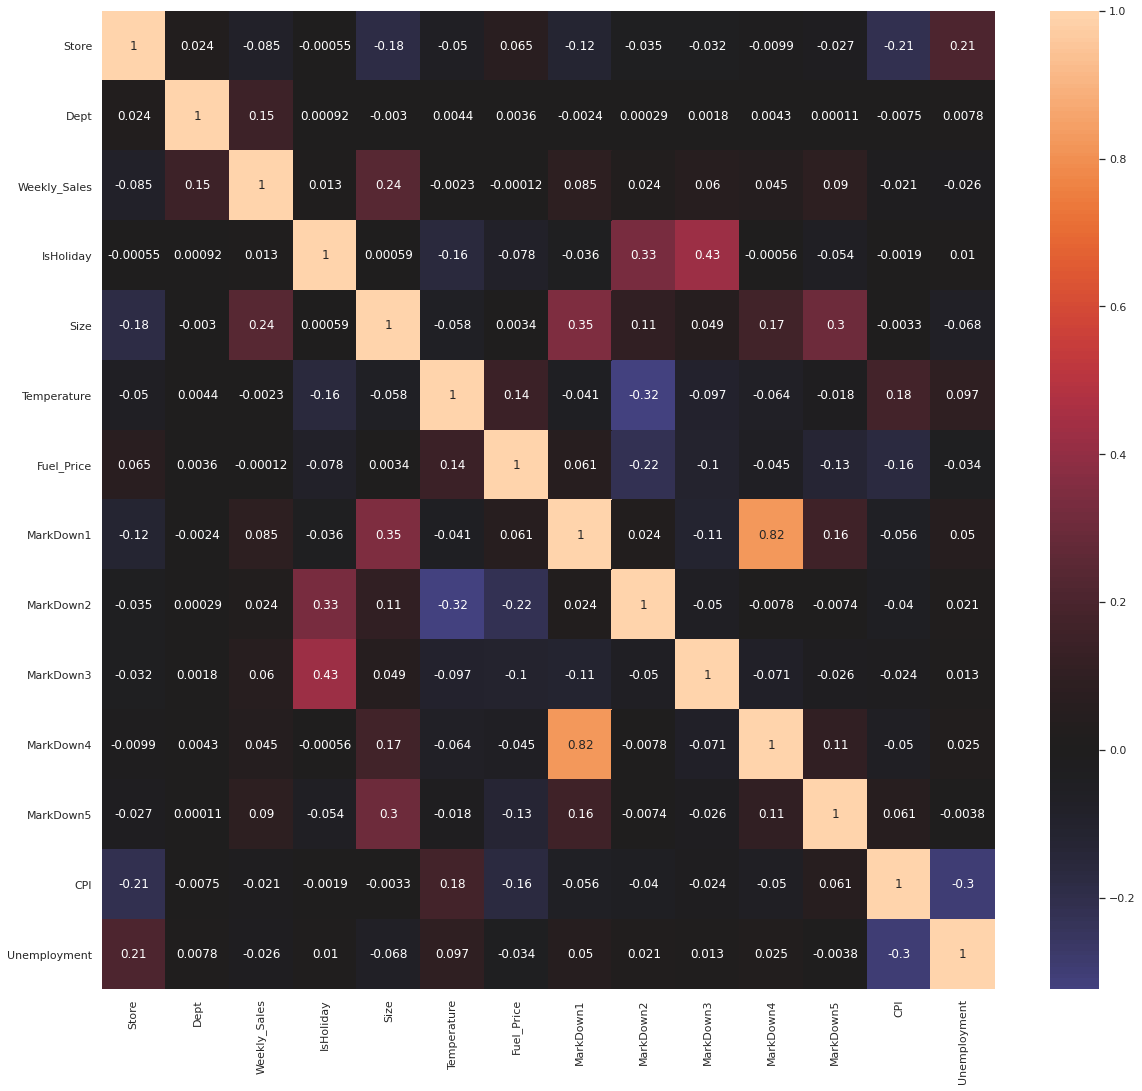

In [ ]:
 import seaborn as sns
 sns.set(rc={'figure.figsize':(20,18)})
 sns.heatmap(df.corr(), center = 0, annot = True)

OLS Regression

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
reg_ols = sm.OLS(y, X)
est = reg_ols.fit()
est.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     3508.
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        15:09:26   Log-Likelihood:            -3.6797e+06
No. Observations:              337256   AIC:                         7.360e+06
Df Residuals:                  337067   BIC:                         7.362e+06
Df Model:                         188                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Size          2.829e+05   4.69e+04      6.036      0.000    1.91e+05    3.75e+05
Temperature  -1282.4472    263.643     -4.864      0.000   -1799.179    -765.715
Fuel_Price     861.5725    517.564      1.665      0.096    -152.837    1875.982
MarkDown1      839.6348    748.958      1.121      0.262    -628.301    2307.571
MarkDown2     -753.0598    603.541     -1.248      0.212   -1935.983     429.864
MarkDown3     6230.2426    753.405      8.269      0.000    4753.591    7706.894
MarkDown4    -2624.2515    788.858     -3.327      0.001   -4170.390   -1078.113
MarkDown5     2747.5789    783.295      3.508      0.000    1212.344    4282.814
CPI           1.751e+04   4493.927      3.895      0.000    8697.291    2.63e+04
Unemployment -8057.5664    819.534     -9.832      0.000   -9663.829   -6451.304
Month         7345.5754   2396.365      3.065      0.002    2648.770     1.2e+04
Year         -1.375e+06   2.43e+05     -5.657      0.000   -1.85e+06   -8.98e+05
Day           -1.71e+04   7874.970     -2.172      0.030   -3.25e+04   -1668.479
TypeA          4.03e+05   7.06e+04      5.708      0.000    2.65e+05    5.41e+05
TypeB         4.839e+05   8.51e+04      5.684      0.000    3.17e+05    6.51e+05
TypeC         5.008e+05   8.83e+04      5.669      0.000    3.28e+05    6.74e+05
Not Holiday   6.938e+05   1.22e+05      5.685      0.000    4.55e+05    9.33e+05
Holiday        6.94e+05   1.22e+05      5.686      0.000    4.55e+05    9.33e+05
Store1        5.146e+04   8149.453      6.314      0.000    3.55e+04    6.74e+04
Store2       -9114.6555   2806.424     -3.248      0.001   -1.46e+04   -3614.145
Store3        1.004e+05   1.79e+04      5.618      0.000    6.54e+04    1.35e+05
Store4       -5845.2265   2340.303     -2.498      0.013   -1.04e+04   -1258.300
Store5        1.019e+05   1.84e+04      5.532      0.000    6.58e+04    1.38e+05
Store6       -1.508e+04   2902.952     -5.194      0.000   -2.08e+04   -9389.672
Store7        6.211e+04   1.12e+04      5.562      0.000    4.02e+04     8.4e+04
Store8        3.629e+04   7261.786      4.998      0.000    2.21e+04    5.05e+04
Store9       -1.194e+04   1255.429     -9.512      0.000   -1.44e+04   -9480.791
Store10       1.446e+04    560.368     25.803      0.000    1.34e+04    1.56e+04
Store11      -2.426e+04   3970.111     -6.110      0.000    -3.2e+04   -1.65e+04
Store12       2.317e+04   3394.685      6.826      0.000    1.65e+04    2.98e+04
Store13      -2.444e+04   5204.869     -4.696      0.000   -3.46e+04   -1.42e+04
Store14      -2937.4461   2011.197     -1.461      0.144   -6879.334    1004.441
Store15      -1038.0369    813.212     -1.276      0.202   -2631.909     555.835
Store16       7.778e+04    1.4e+04      5.558      0.000    5.03e+04    1.05e+05
Store17       4.213e+04   7295.229      5.775      0.000    2.78e+04    5.64e+04
Store

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.53e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

In [ ]:
y_pred = est.predict(X)

r_2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)

print("R squared:", r_2)
print("RMSE:", rmse)
print("MAE:", mae)

R squared: 0.661762965258653
RMSE: 13251.964230358764
MAE: 8136.193176434836


Lasso regression

In [ ]:
import lightgbm as lgb

In [ ]:
reg_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=60, max_depth = 9, learning_rate=0.5, n_estimators=2000, reg_alpha=0.6, subsample=0.6, colsample_bytree = 0.8, scale_pos_weight = 5)
reg_lgb.fit(X, y, verbose=False)

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.5, max_depth=9,
              n_estimators=2000, num_leaves=60, objective='regression',
              reg_alpha=0.6, scale_pos_weight=5, subsample=0.6)

In [ ]:
y_pred = reg_lgb.predict(X)

r_2 = reg_lgb.score(X, y)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)

print("R squared:", r_2)
print("RMSE:", rmse)
print("MAE:", mae)

R squared: 0.9958978155441578
RMSE: 1459.4098333338297
MAE: 914.7023986473777


Neural Network

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[len(X.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               50432     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 93,697
Trainable params: 93,697
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_stats = train_data.describe()
train_stats.pop("Weekly_Sales")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Size,337256.0,0.622358,0.277586,0.158796,0.426360,0.638219,0.922062,1.0
Temperature,337256.0,0.600124,0.184071,-0.020571,0.466347,0.620032,0.741762,1.0
Fuel_Price,337256.0,0.752146,0.102522,0.553268,0.656446,0.772605,0.836392,1.0
MarkDown1,337256.0,0.081800,0.056092,0.000003,0.081800,0.081800,0.081800,1.0
MarkDown2,337256.0,0.031779,0.046444,-0.002543,0.031779,0.031779,0.031779,1.0
...,...,...,...,...,...,...,...,...
Week48,337256.0,0.013844,0.116844,0.000000,0.000000,0.000000,0.000000,1.0
Week49,337256.0,0.013915,0.117139,0.000000,0.000000,0.000000,0.000000,1.0
Week50,337256.0,0.021245,0.144200,0.000000,0.000000,0.000000,0.000000,1.0
Week51,337256.0,0.014233,0.118448,0.000000,0.000000,0.000000,0.000000,1.0


In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
  
norm_X = norm(X)
norm_X_test = norm(X_test)

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200

history = model.fit(
  norm_X, y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
195,2707227.25,910.435852,2707227.25,7609619.0,1311.893188,7609619.0,195
196,2693397.75,906.815491,2693397.75,7750266.5,1326.638428,7750266.5,196
197,2756885.50,908.915894,2756885.50,7774429.0,1341.088501,7774429.0,197
198,2759579.50,907.695129,2759579.50,7523794.5,1320.089844,7523794.5,198
199,2728897.50,906.005249,2728897.50,8069109.5,1364.283813,8069109.5,199


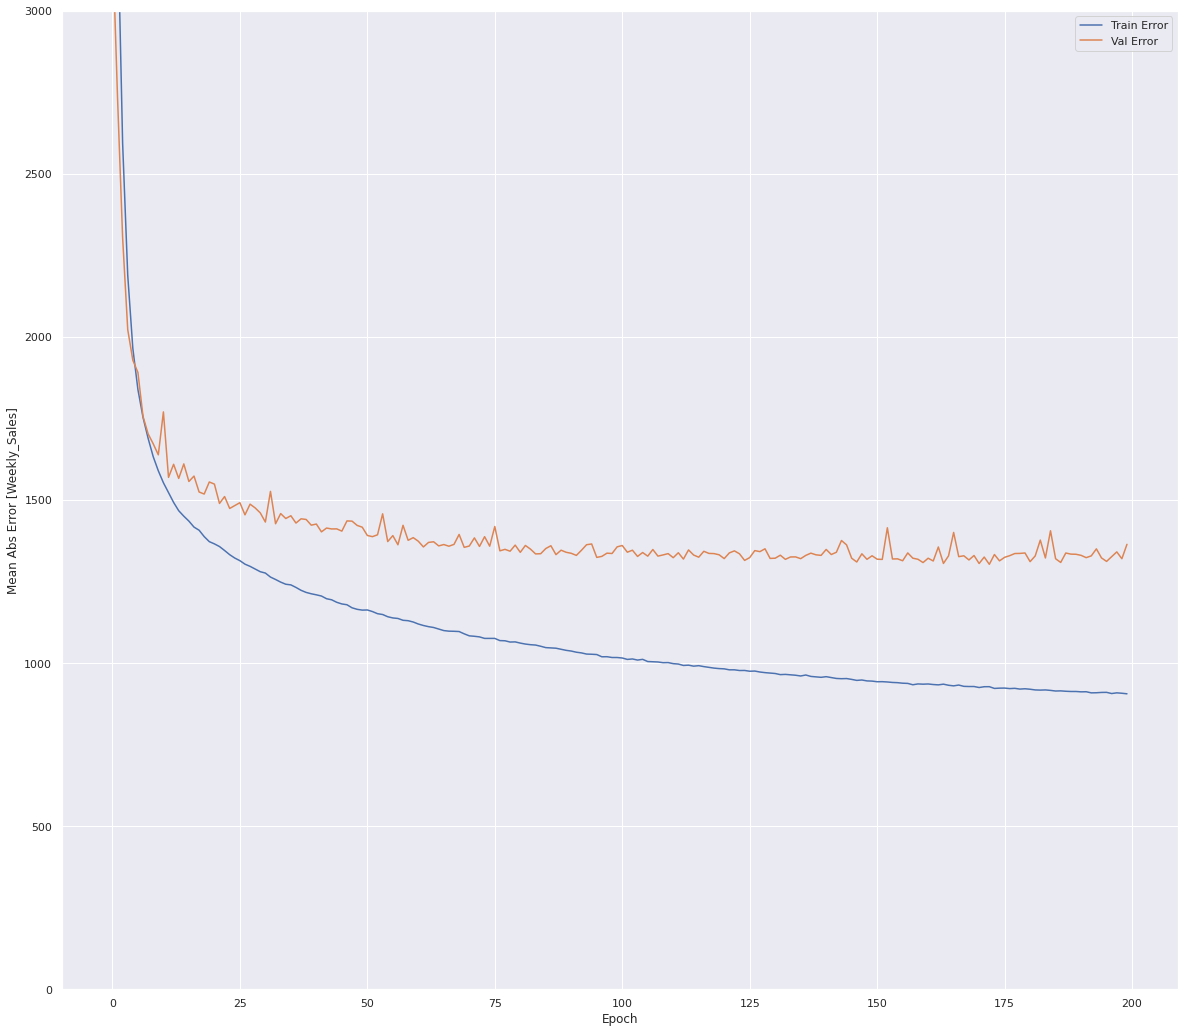

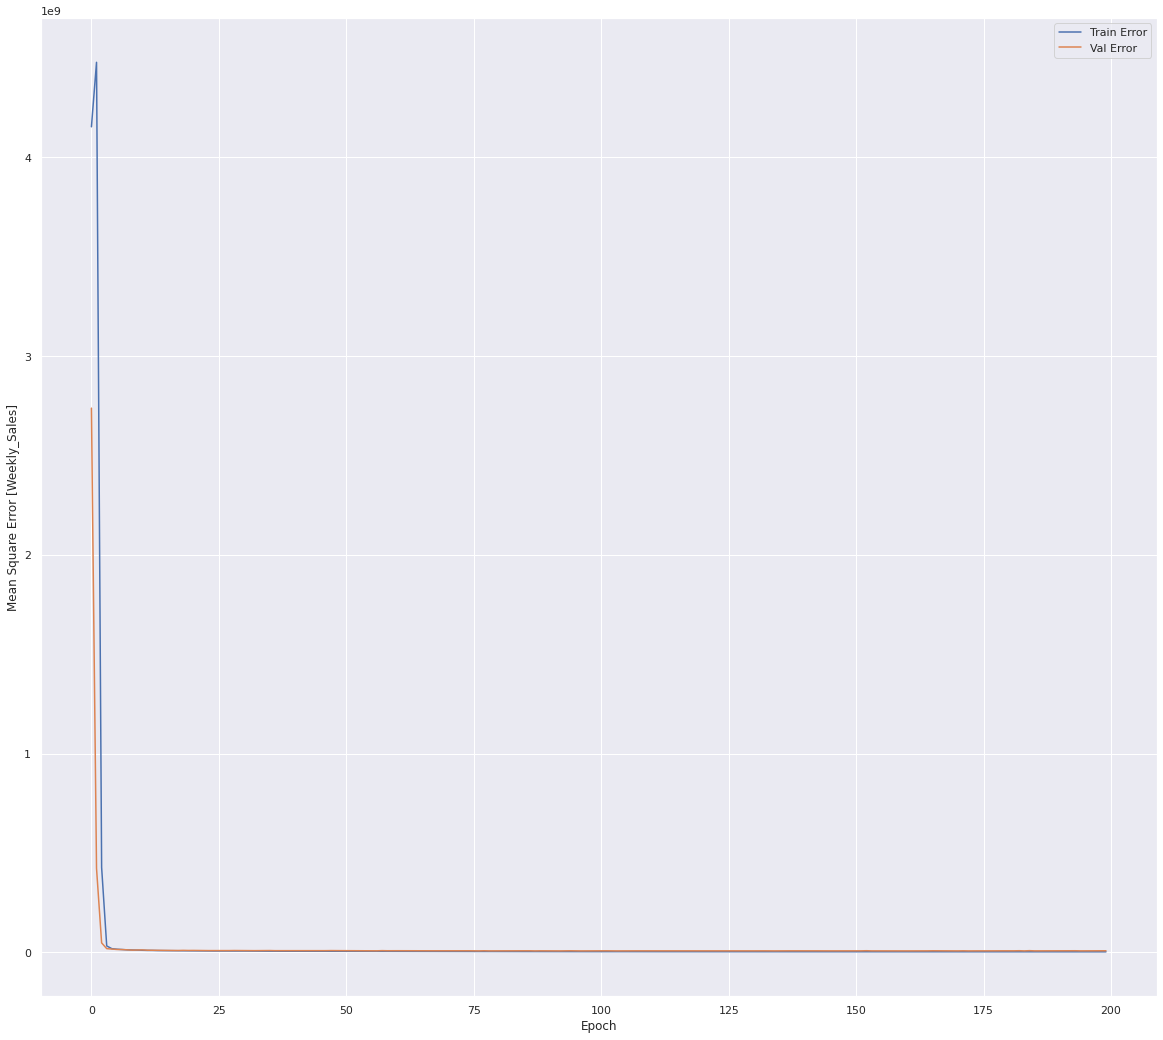

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Weekly_Sales]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,3000])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [Weekly_Sales]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
#   plt.ylim([0,3000])
  plt.legend()
  plt.show()

plot_history(history)

In [ ]:
y_pred = model.predict(norm_X)

r_2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)

print("R squared:", r_2)
print("RMSE:", rmse)
print("MAE:", mae)

R squared: 0.9926765731193019
RMSE: 1949.9651547388053
MAE: 1004.4149953771489
